# 1. Prétraitement du dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('power.csv', delimiter=',')

In [4]:
nan_values = df.isna().sum()

In [5]:
print("Valeurs NaN par colonne :")
print(nan_values)

Valeurs NaN par colonne :
dt                           0
Global_active_power      25979
Global_reactive_power    25979
dtype: int64


## Visualisation des valeurs manquantes

In [6]:
# Afficher les noms de toutes les colonnes du DataFrame
print(df.columns)

Index(['dt', 'Global_active_power', 'Global_reactive_power'], dtype='object')


In [8]:
df.head()

,dt,Global_active_power,Global_reactive_power
0,2006-12-16 17:24:00,4.216,0.418
1,2006-12-16 17:25:00,5.360,0.436
2,2006-12-16 17:26:00,5.374,0.498
3,2006-12-16 17:27:00,5.388,0.502
4,2006-12-16 17:28:00,3.666,0.528


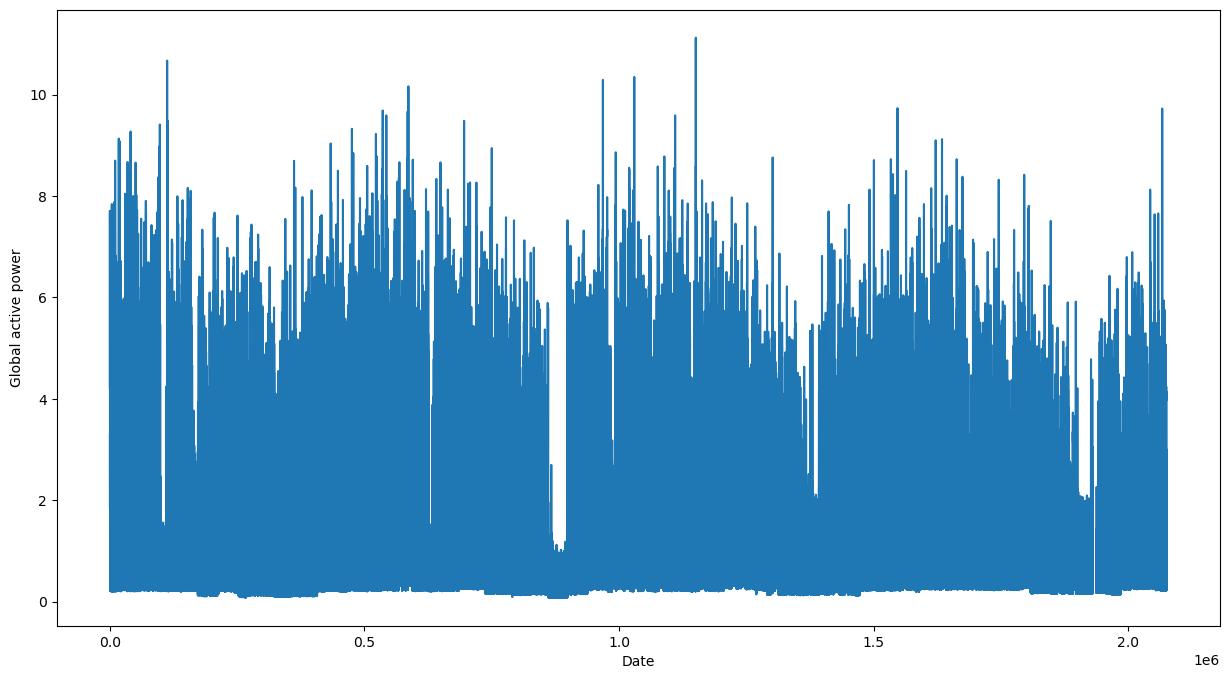

In [7]:
plt.figure(figsize=(15,8))
plt.plot(df['Global_active_power'])
plt.xlabel('Date')
plt.ylabel('Global active power')
plt.show()

# 2. Modèle de prédiction de Global_active_power avec LSTM

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [10]:
df = pd.read_csv('power.csv', delimiter=',')

In [14]:
column_name = 'Global_active_power'
#la convertit en un tableau, et la reformate en un tableau 2D avec une seule colonne pour chaque échantillon.
data = df[column_name].values.reshape(-1, 1)


[[4.216]
 [5.36 ]
 [5.374]
 ...
 [0.938]
 [0.934]
 [0.932]]


## Normalisation des données

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [5]:
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

In [6]:
sequence_length = 10
X, y = create_sequences(data_scaled, sequence_length)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Création du modèle LSTM

In [8]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [9]:
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
51882/51882 [==============================] - 359s 7ms/step - loss: nan
Epoch 2/10
51882/51882 [==============================] - 379s 7ms/step - loss: nan
Epoch 3/10
51882/51882 [==============================] - 379s 7ms/step - loss: nan
Epoch 4/10
51882/51882 [==============================] - 402s 8ms/step - loss: nan
Epoch 5/10
51882/51882 [==============================] - 401s 8ms/step - loss: nan
Epoch 6/10
51882/51882 [==============================] - 396s 8ms/step - loss: nan
Epoch 7/10
51882/51882 [==============================] - 397s 8ms/step - loss: nan
Epoch 8/10
51882/51882 [==============================] - 392s 8ms/step - loss: nan
Epoch 9/10
51882/51882 [==============================] - 405s 8ms/step - loss: nan
Epoch 10/10
51882/51882 [==============================] - 410s 8ms/step - loss: nan


In [10]:
loss = model.evaluate(X_test, y_test)
print(f'Loss (Mean Squared Error) on test data: {loss}')

12971/12971 [==============================] - 53s 4ms/step - loss: nan
Loss (Mean Squared Error) on test data: nan


In [11]:
predicted_data_scaled = model.predict(X_test)
predicted_data = scaler.inverse_transform(predicted_data_scaled)

12971/12971 [==============================] - 48s 4ms/step


In [12]:
import matplotlib.pyplot as plt


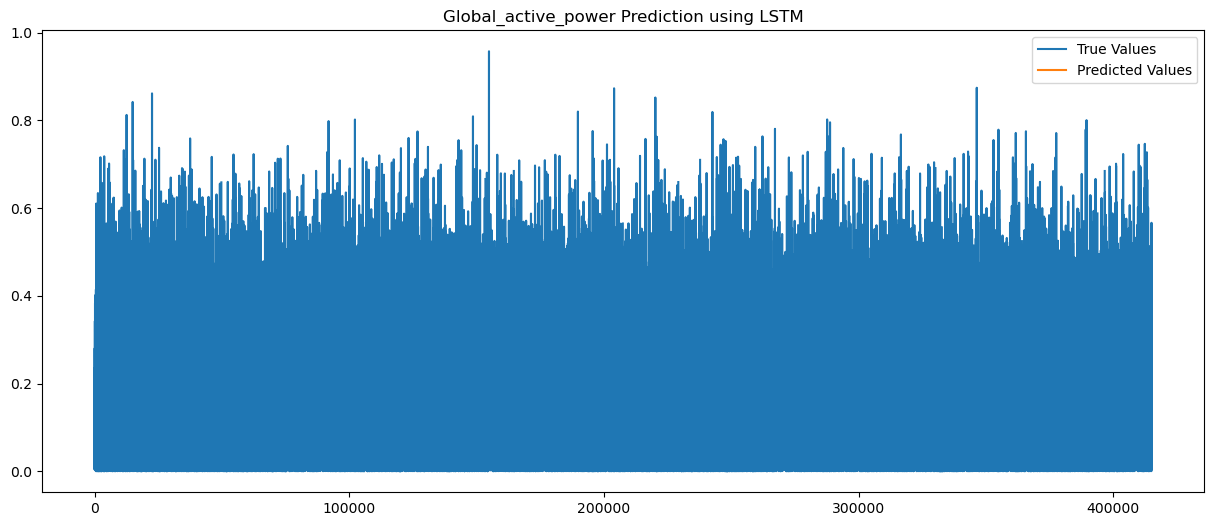

In [13]:
plt.figure(figsize=(15, 6))
plt.plot(y_test, label='True Values')
plt.plot(predicted_data, label='Predicted Values')
plt.title('Global_active_power Prediction using LSTM')
plt.legend()
plt.show()